Average Rating per Category:
 main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.155654
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64

Top Rated Product by Category:
                                                             product_name  \
main_category                                                              
Car&Motorbike          Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories          SanDisk Cruzer Blade 32GB USB Flash Drive   
Electronics            AmazonBasics Flexible Premium HDMI Cable (Blac...   
Health&PersonalCare    Dr Trust Electronic Kitchen Digital Scale Weig...   
Home&Kitchen           Pigeon Polypropylene Mini Handy and Compact Ch...   
HomeImprovement        Gizga Essentials Cable Organiser,

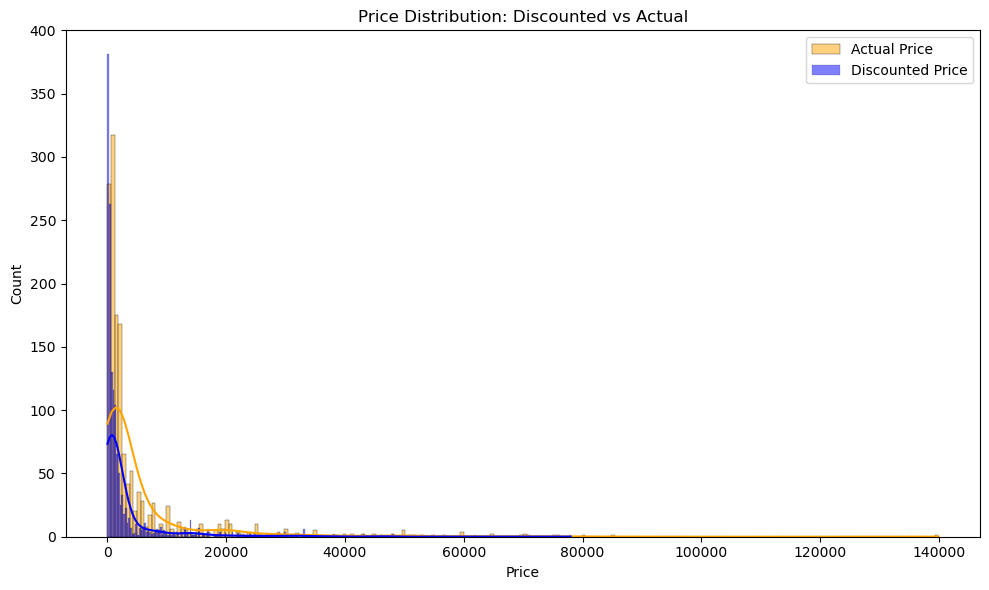


Average Discount % per Category:
 main_category
HomeImprovement          57.500000
Computers&Accessories    53.920177
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.174497
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64

Most Popular Product Names:
 product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the data
df = pd.read_csv("amazon.csv")

# ----------- Data Cleaning -----------
# Clean numeric fields
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Extract main category
df['main_category'] = df['category'].str.split('|').str[0]

# Drop rows with missing values in critical columns
df.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count', 'discount_percentage'], inplace=True)

# ----------- 1. Average rating per category -----------
avg_rating = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
print("Average Rating per Category:\n", avg_rating)

# ----------- 2. Top product by rating_count per category -----------
top_rated = df.sort_values('rating_count', ascending=False).groupby('main_category').first()
print("\nTop Rated Product by Category:\n", top_rated[['product_name', 'rating_count', 'rating']])

# ----------- 3. Distribution of discounted vs actual prices -----------
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], color='orange', label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True)
plt.legend()
plt.title('Price Distribution: Discounted vs Actual')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ----------- 4. Average discount percentage per category -----------
avg_discount = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print("\nAverage Discount % per Category:\n", avg_discount)

# ----------- 5. Most popular product names -----------
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
print("\nMost Popular Product Names:\n", popular_products)

# ----------- 6. Most popular product keywords -----------
if 'product_keywords' in df.columns:
    keywords_series = df['product_keywords'].dropna().str.split(', ')
    flat_keywords = [kw for sublist in keywords_series for kw in sublist]
    popular_keywords = Counter(flat_keywords).most_common(10)
    print("\nMost Popular Product Keywords:\n", popular_keywords)

# ----------- 7. Most popular product reviews -----------
popular_reviews = df['review_content'].value_counts().head(10)
print("\nMost Common Product Reviews:\n", popular_reviews)

# ----------- 8. Correlation between discounted_price and rating -----------
correlation = df['discounted_price'].corr(df['rating'])
print(f"\nCorrelation between Discounted Price and Rating: {correlation:.3f}")

# ----------- 9. Top 5 categories by highest average ratings -----------
top5_categories = avg_rating.head(5)
print("\nTop 5 Categories by Rating:\n", top5_categories)

# ----------- 10. Suggestions for Improvement -----------
# Example: Products with high discount but low ratings
low_rating_high_discount = df[(df['discount_percentage'] > 50) & (df['rating'] < 3.5)]
print("\nHigh Discount but Low Rating Products (Possible Optimization Targets):\n",
      low_rating_high_discount[['product_name', 'rating', 'discount_percentage']].head())
